## Task2

在任务二中，我们要利用**核函数**来对非线性样本进行SVM分类

In [7]:
import numpy as np
import pandas as pd
from sklearn import svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

![](img/1.png)

In [2]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- np.power(x1 - x2, 2).sum() / (2 * sigma**2))

In [3]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

## load data

In [5]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())

data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')
data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


## visualization

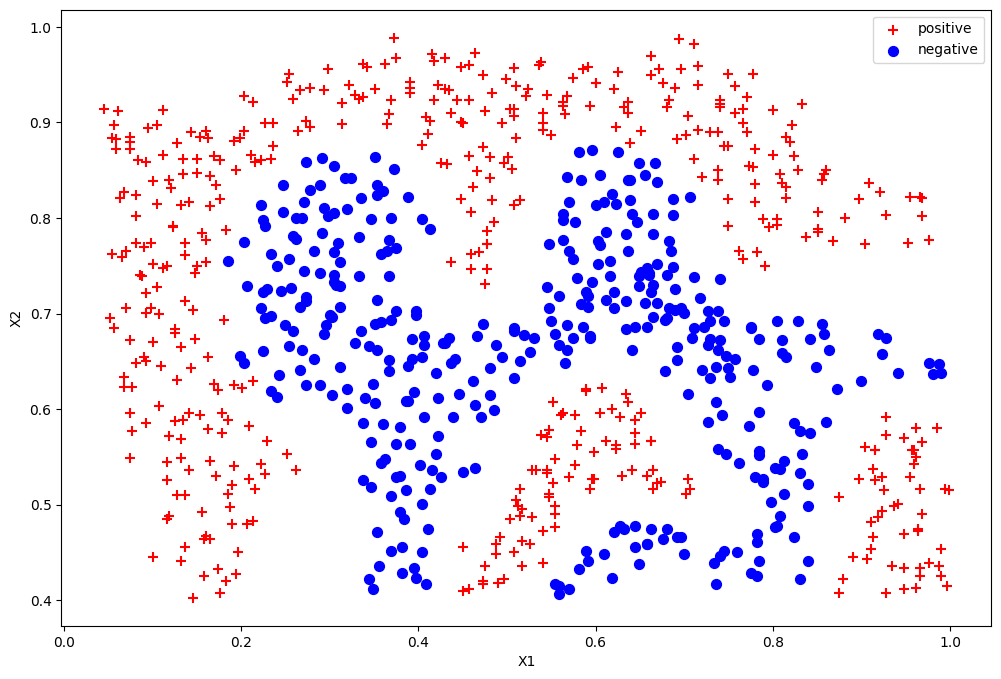

In [6]:
positive = data[data.y == 1]
negative = data[data['y'] == 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

## sklearn.svm use gaussian kernel

我们使用内置的RBF核函数来构建SVM，通常我们默认$\gamma = \frac{1}{2\sigma ^ 2}$，所以$\gamma$与$\sigma$成反比

$\gamma$越小，核函数变化越平缓（容易欠拟合），反之则越剧烈（容易过拟合）

## try gamma = 1

In [8]:
svc1 = svm.SVC(C=100, kernel='rbf', gamma=1, probability=True)
svc1

SVC(C=100, gamma=1, probability=True)

In [10]:
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

0.8342989571263036

## decision boundary

In [11]:
min(data['X1']), max(data['X1']), min(data['X2']), max(data['X2'])

(0.0449309, 0.998848, 0.402632, 0.988596)

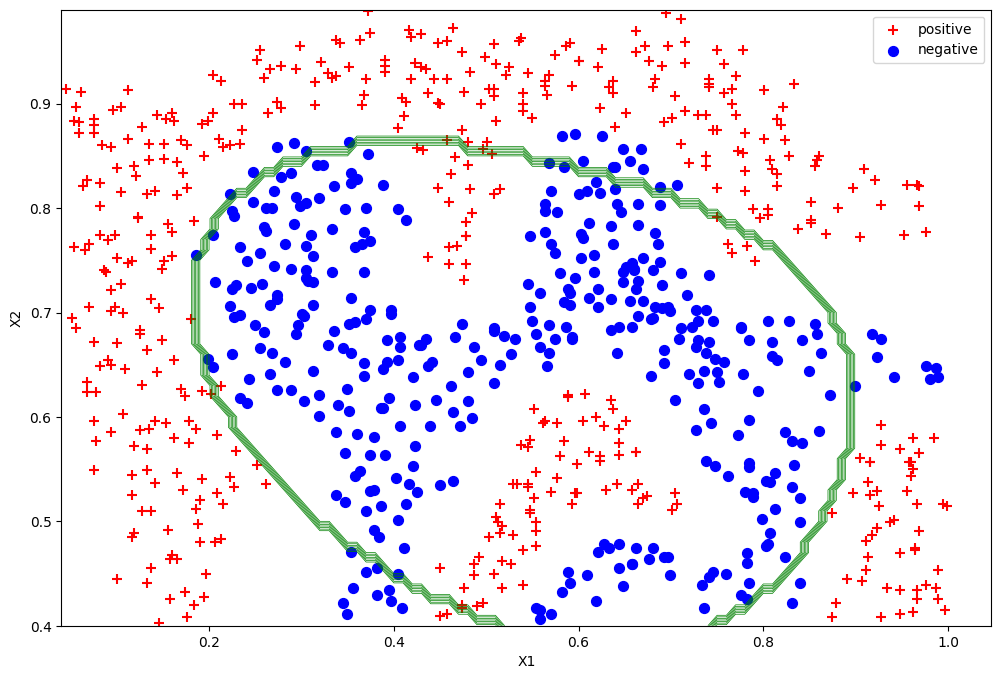

In [20]:
positive = data[data.y == 1]
negative = data[data['y'] == 0]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0.04, 1, 0.01)
x2 = np.arange(0.4, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)
xx = np.vstack((x1.ravel(), x2.ravel())).T
xx_df = pd.DataFrame(xx, columns=['X1', 'X2'])
y_pred = svc1.predict(xx_df).reshape(x1.shape)
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

查看置信水平

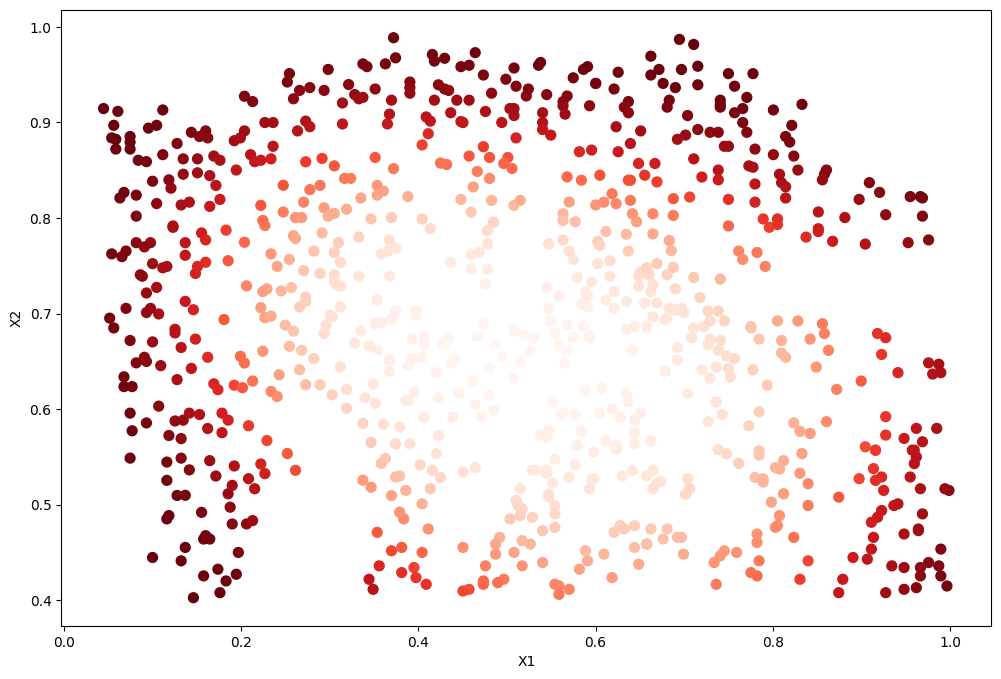

In [32]:
predict_proba = svc1.predict_proba(data[['X1', 'X2']])[:, 1]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=50, c=predict_proba, cmap='Reds')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()

## try gamma = 100

$\gamma$ 越大则 $\sigma$ 越小，高斯核函数越瘦，模型越容易过拟合

In [30]:
svc2 = svm.SVC(C=100, kernel='rbf', gamma=100, probability=True)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

0.9988412514484357

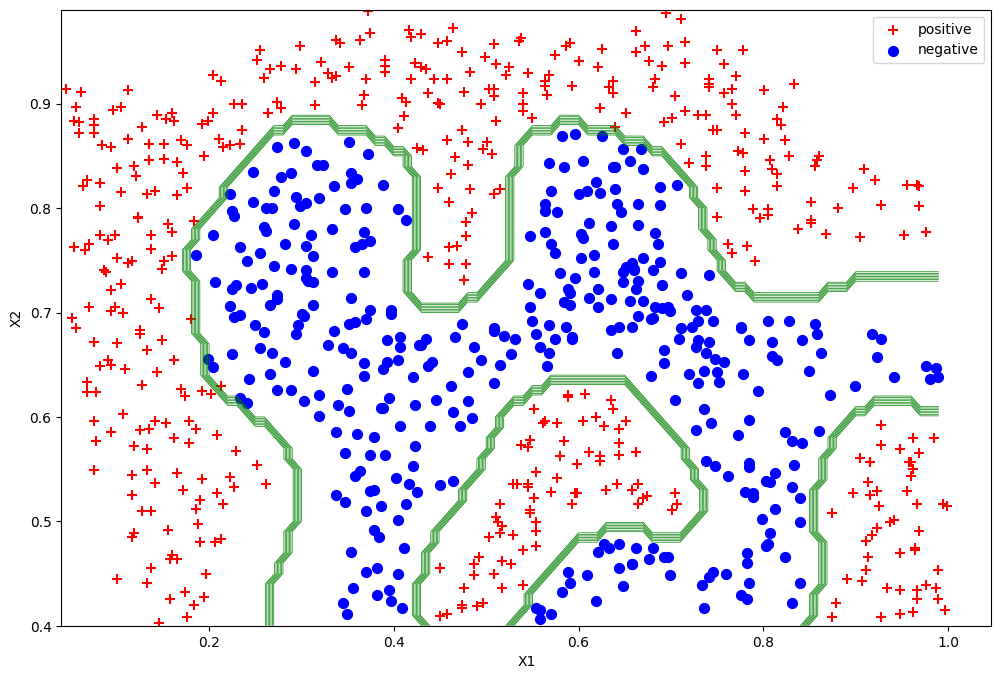

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0.04, 1, 0.01)
x2 = np.arange(0.4, 1, 0.01)
x1, x2 = np.meshgrid(x1, x2)
xx = np.vstack((x1.ravel(), x2.ravel())).T
xx_df = pd.DataFrame(xx, columns=['X1', 'X2'])
y_pred = svc2.predict(xx_df).reshape(x1.shape)
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

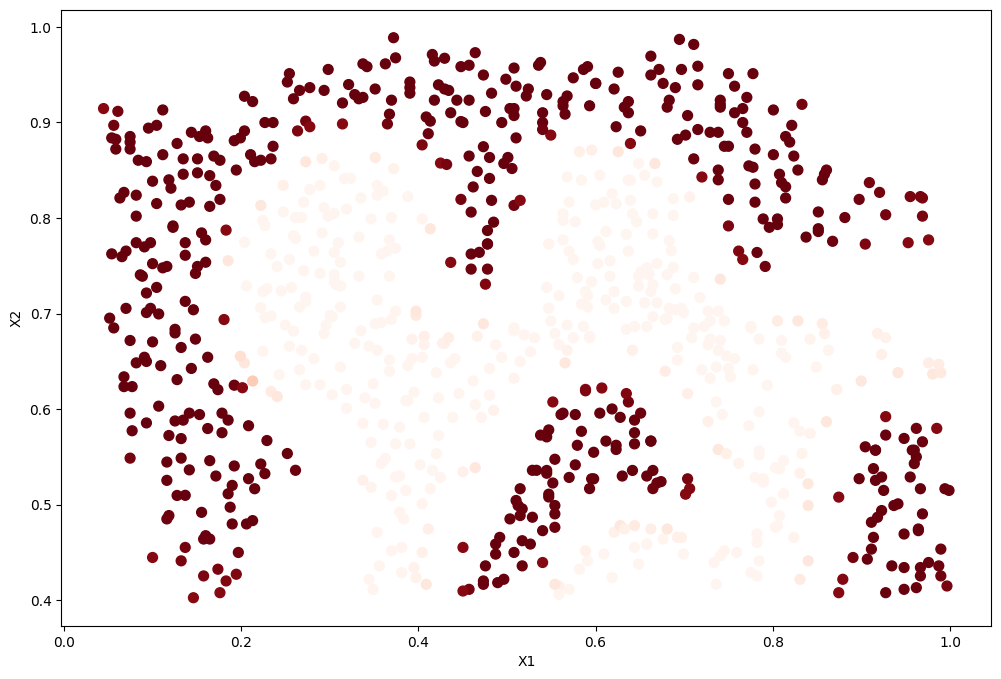

In [33]:
predict_proba = svc2.predict_proba(data[['X1', 'X2']])[:, 1]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data['X1'], data['X2'], s=50, c=predict_proba, cmap='Reds')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()